# Import Libraries

In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Read and View Data

In [15]:
# Read in data
real = pd.read_csv('True.csv')

fake = pd.read_csv('Fake.csv')

In [16]:
# View real news dataset
real.head()

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"


In [17]:
# View fake news dataset
fake.head()

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"


# Create Plots

## Pie Charts

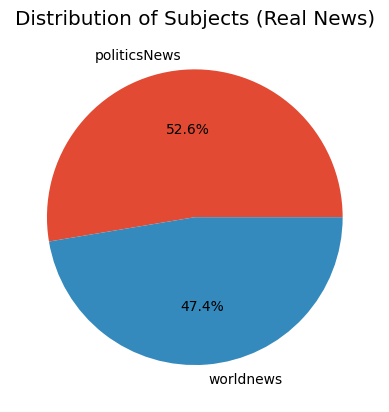

In [18]:
# See what values there are for subject (real news)
real['subject'].unique()
real_subject_frequencies = real['subject'].value_counts()
real_subject_frequencies

# Plot value counts directly as a pie chart
real_subject_frequencies.plot(kind='pie', autopct='%1.1f%%', title='Distribution of Subjects (Real News)')
plt.ylabel('') # Hide the y-axis label for a cleaner look
plt.show()

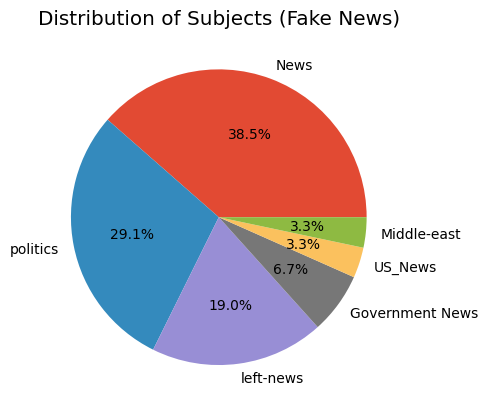

In [19]:
# See what values there are for subject (fake news)
fake['subject'].unique()
fake_subject_frequencies = fake['subject'].value_counts()
fake_subject_frequencies

# Plot value counts directly as a pie chart
fake_subject_frequencies.plot(kind='pie', autopct='%1.1f%%', title='Distribution of Subjects (Fake News)')
plt.ylabel('') # Hide the y-axis label for a cleaner look
plt.show()

## Combine Piecharts

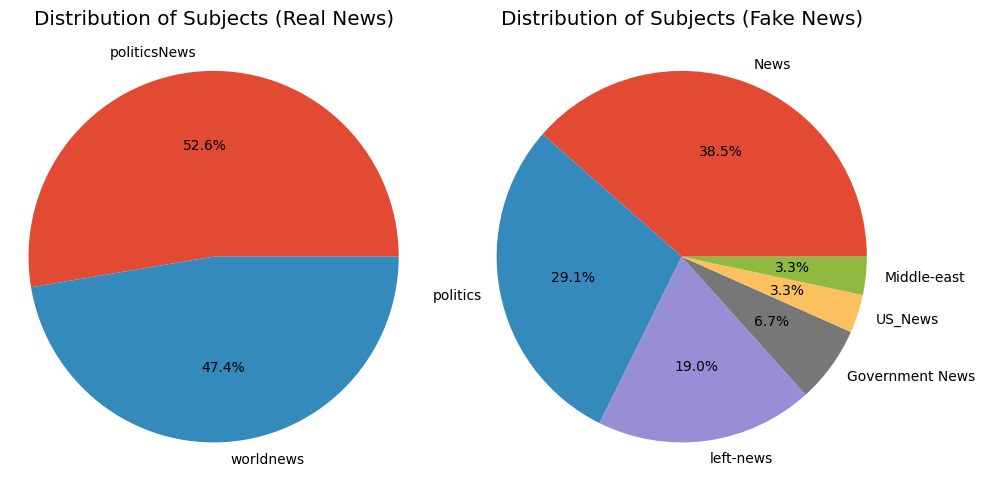

In [20]:
# 3. Create a figure and a set of subplots (1 row, 2 columns)
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))

# 4. Plot the first pie chart on ax1
ax1.pie(real_subject_frequencies.values, labels=real_subject_frequencies.index, autopct='%1.1f%%')
ax1.set_title('Distribution of Subjects (Real News)')
# Ensure the pie chart is drawn as a circle (optional, but good practice)
ax1.axis('equal') 

# 5. Plot the second pie chart on ax2
ax2.pie(fake_subject_frequencies.values, labels=fake_subject_frequencies.index, autopct='%1.1f%%')
ax2.set_title('Distribution of Subjects (Fake News)')
ax2.axis('equal')

# 6. Adjust layout and display the plots
plt.tight_layout() # Prevents titles/labels from overlapping

plt.savefig('Distribution_of_Subjects.png')
plt.show()

## Calculate the lengths of each headline

In [21]:
# Find the length of each string in each cell for the real news dataset
real_len = real.apply(lambda col: col.str.len())
real_len

,title,text,subject,date
0,64,4659,12,18
1,64,4077,12,18
2,60,2789,12,18
3,59,2461,12,18
4,69,5204,12,18
...,...,...,...,...
21412,61,2821,9,16
21413,52,800,9,16
21414,49,1950,9,16
21415,61,1199,9,16


In [22]:
# Find the length of each string in each cell for the real news dataset
fake_len = fake.apply(lambda col: col.str.len())
fake_len

,title,text,subject,date
0,79,2893,4,17
1,69,1898,4,17
2,90,3597,4,17
3,78,2774,4,17
4,70,2346,4,17
...,...,...,...,...
23476,61,3237,11,16
23477,81,1684,11,16
23478,85,25065,11,16
23479,67,2685,11,16


## Plot Headline Length Distribution as Histograms

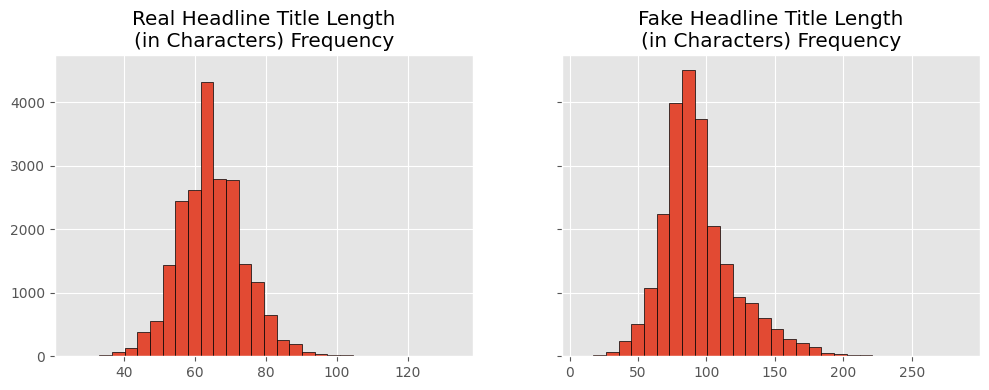

In [31]:
# Histograms showing the frequency of each length within the "title" column
plt.style.use('ggplot')

fig, axes = plt.subplots(1, 2, figsize=(10, 4), sharey=True)

axes[0].hist(real_len['title'].dropna(), bins=30, edgecolor='black')
axes[0].set_title('Real Headline Title Length\n(in Characters) Frequency')

axes[1].hist(fake_len['title'].dropna(), bins=30, edgecolor='black')
axes[1].set_title('Fake Headline Title Length\n(in Characters) Frequency')

fig.tight_layout(w_pad=6)

# Save it so that GitHub doesn't crop it
fig.savefig(
    'Distribution_of_Headline_Lengths.png',
    dpi=300,
    bbox_inches='tight',
    pad_inches=0.25
)

plt.show()
